# **AYUDANTÍA 9 - Introducción a la Ciencia de Datos - IMT2200 🎃**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)


# Regresión lineal simple, multiple y polinomial



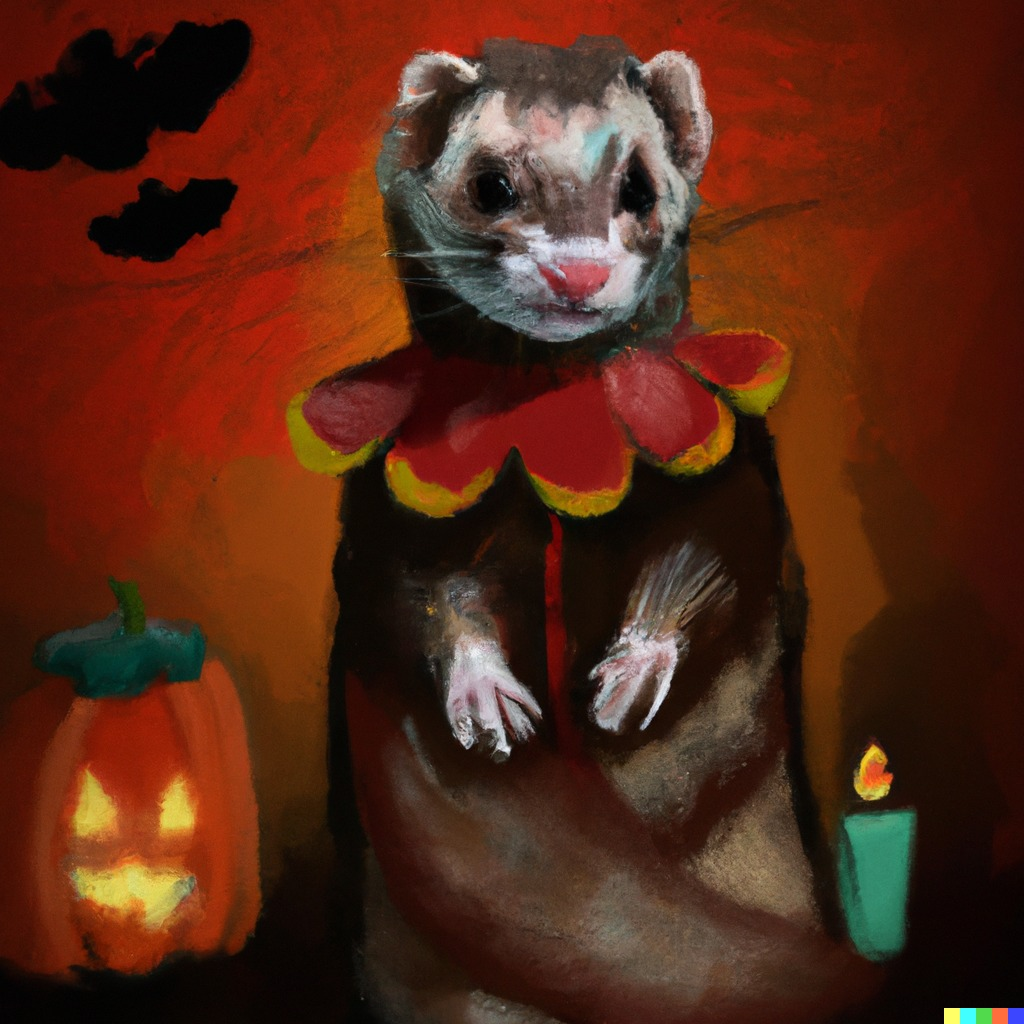

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

### Nuestro objetivo es modelar la relación entre variables, o nuestro caso datos.

Como saben de otros curso de matematicos hay diferentes tipos de relaciones entre variables, tenemos las simples, multiples, cuadraticas, polinomiales, lineales, etc.

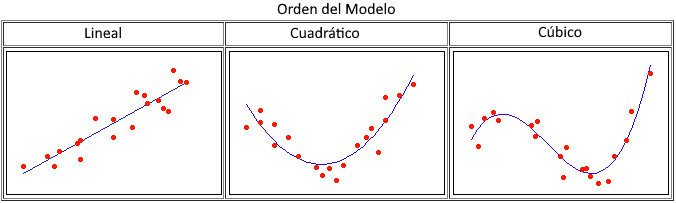

# Base de datos

Tenemos la base de datos sobre autos, tendremos sus carateriscas como nombre, motor, cantidad de puertas.Tambien tendremos su precio.

Como analistas queremos ver que caracteriscas del auto podrian ser clave para valorizar un auto.

In [ ]:
cars = pd.read_csv('car.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Regresión simple

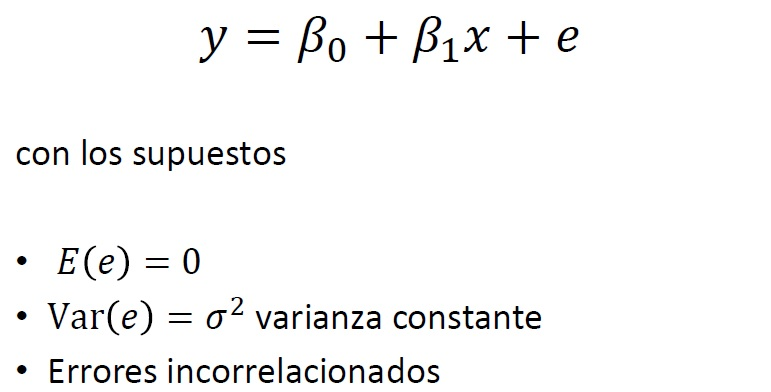

Explicación de la estimación de parametros: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal

De manera previa, ya que vamos a hace runa regresión simple, vamos a escoger que dato podria ser el que mas nos entregue información sobre el precio del auto.

Como hemos visto en ayudantias pasadas podemos ver que dato se correlaciona más con el precio y asi entrenar a nuestro modelo de regresión lineal.

In [ ]:
train_cols = cars.corr()[['price']].drop('price').abs()
train_cols = train_cols[train_cols['price']==train_cols['price'].max()]

train_cols = train_cols.index.values
train_cols

<ipython-input-75-4001ba9d4f67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_cols = cars.corr()[['price']].drop('price').abs()


array(['enginesize'], dtype=object)

In [ ]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)

x =cars[train_cols].values
y = cars['price']

lr.fit(x.reshape(-1,1),y)

LinearRegression()

¿Que hace reshape?

Pagina de numpy: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [ ]:
x =cars[train_cols].values
#print(x)
#print(x.reshape(-1,1))

Vemos los coeficientes de regresión

In [ ]:
lr.coef_

array([167.69841639])

El intercepto

In [ ]:
lr.intercept_

-8005.445531145204

In [ ]:
y_pred = lr.predict(x.reshape(-1,1))


Grafiquemos los datos y la regresión

ValueError: ignored

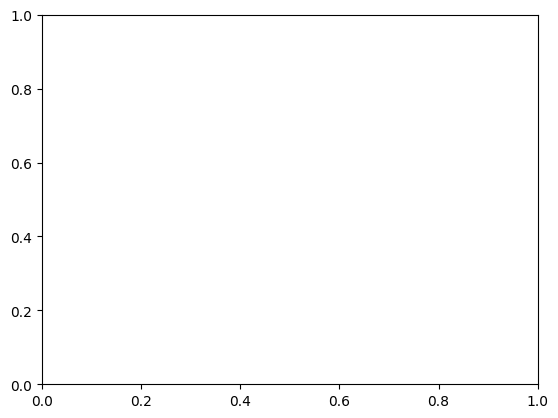

In [ ]:
plt.scatter(x, y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()


Veamos que tambien explica esta regresion los datos que ya tenemos.

R-cuadrado

In [ ]:
r2_score(y, y_pred)


0.7641291357806176

## Regresión multiple

In [ ]:
train_cols = cars.corr()[['price']].drop('price').abs()
train_cols = train_cols.loc[train_cols['price'] >= 0.5]
train_cols = train_cols.index.values
train_cols

<ipython-input-86-71d1b667b29d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_cols = cars.corr()[['price']].drop('price').abs()


array(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg'], dtype=object)

In [ ]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =cars[train_cols]
y = cars['price']
lr.fit(x,y)

LinearRegression()

In [ ]:
lr.coef_

array([  109.89533077,   -57.85338352,   532.46670928,     2.91776301,
          83.61504305, -1140.46365927,    53.75355146,  -119.81462393,
         122.85527104])

In [ ]:
lr.intercept_

-43223.92592864545

In [ ]:
y_pred = lr.predict(x)

In [ ]:
r2_score(y, y_pred)

0.8223081964492375

## Regresión polinomial

### Regresión cuadratica

In [ ]:
x = cars['carlength'].values
y = cars['price']
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))


#x_poly = pd.DataFrame(x_poly, columns=poly.get_feature_names_out())

In [ ]:
lr=LinearRegression()
lr.fit(x_poly,y)

LinearRegression()

In [ ]:
lr.coef_

array([    0.        , -2425.27641566,     8.19274642])

In [ ]:
lr.intercept_

185969.29374363562

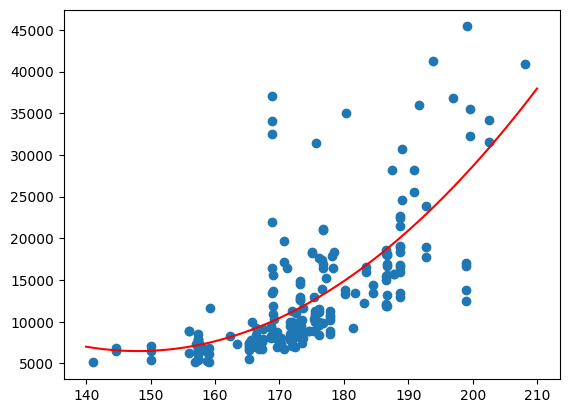

In [ ]:
plt.scatter(x, y)

x_reg=np.linspace(140,210)

y_reg = (x_reg**1)*lr.coef_[1] + (x_reg**2)*lr.coef_[2] + lr.intercept_

plt.plot(x_reg, y_reg, color='red')

plt.show()

In [ ]:
y_pred = lr.predict(x_poly)

¿Y su R_2?

In [ ]:
r2_score(y, y_pred)

0.5116238425441122

## ¡Importancia de entender los conceptos que se manejan en estadistica y tambien de cuestionar nuestros resultados!

### Anscombe's quartet

In [ ]:
ejemplo = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv')
ejemplo.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
df1=ejemplo[ejemplo['dataset']=='I']
df1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
df2=ejemplo[ejemplo['dataset']=='II']
df2.head()

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


In [ ]:
df3=ejemplo[ejemplo['dataset']=='III']
df3.head()

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81


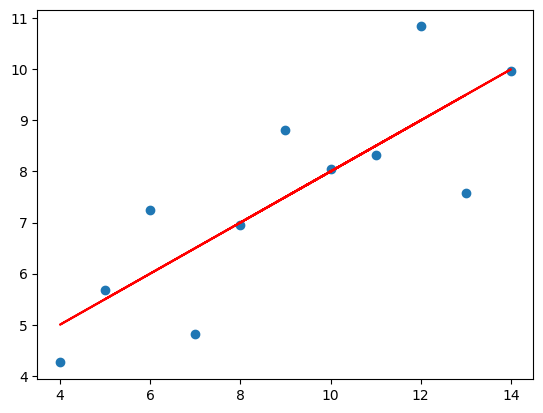

In [ ]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df1['x'].values
y = df1['y']
lr.fit(x.reshape(-1,1),y)
plt.scatter(x, y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

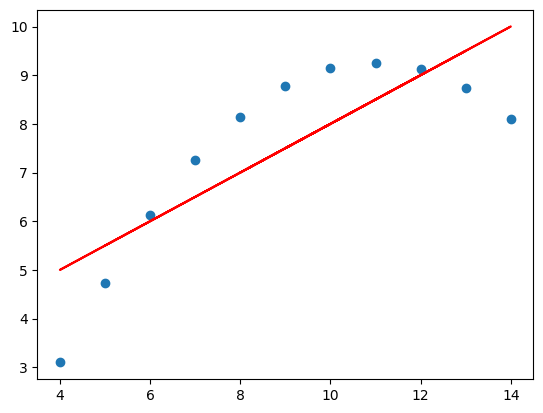

In [ ]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df2['x'].values
y = df2['y']
lr.fit(x.reshape(-1,1),y)
plt.scatter(x, y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

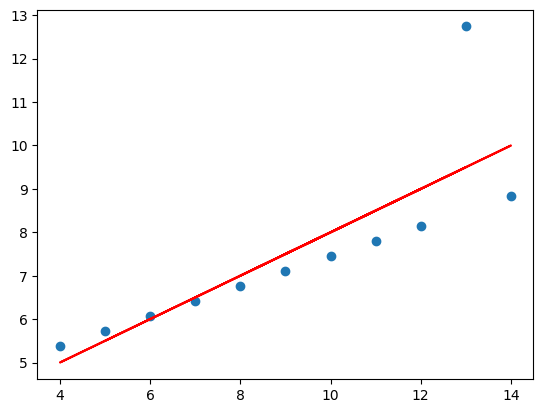

In [ ]:
lr = LinearRegression()
# para regresion lineal simple, usamos x.reshape(-1, 1)
x =df3['x'].values
y = df3['y']
lr.fit(x.reshape(-1,1),y)
plt.scatter(x, y)
y_reg = x*lr.coef_[0] + lr.intercept_
plt.plot(x, y_reg, color='red')
plt.show()

Mas informacion de este ejemplo en : https://en.wikipedia.org/wiki/Anscombe%27s_quartet

Te invito a investigar mas sobre las regresiones y su utilidad en diferentes areas del conocimiento: https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal